In [42]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
from sklearn.impute import SimpleImputer
%matplotlib inline

In [62]:
#read the CSV file
missingdf = pd.read_excel("./Dataset/MarketSales.xlsx")

In [63]:
#list all columns
missingdf.columns

Index(['ID', 'ITEMCODE', 'ITEMNAME', 'FICHENO', 'DATE_', 'AMOUNT', 'PRICE',
       'LINENETTOTAL', 'LINENET', 'BRANCHNR', 'BRANCH', 'SALESMAN', 'CITY',
       'REGION', 'LATITUDE', 'LONGITUDE', 'CLIENTCODE', 'CLIENTNAME',
       'BRANDCODE', 'BRAND', 'CATEGORY_NAME1', 'CATEGORY_NAME2',
       'CATEGORY_NAME3', 'STARTDATE', 'ENDDATE', 'GENDER'],
      dtype='object')

In [64]:
missingdf.dtypes

ID                       float64
ITEMCODE                 float64
ITEMNAME                  object
FICHENO                    int64
DATE_             datetime64[ns]
AMOUNT                   float64
PRICE                    float64
LINENETTOTAL             float64
LINENET                  float64
BRANCHNR                 float64
BRANCH                    object
SALESMAN                  object
CITY                      object
REGION                    object
LATITUDE                 float64
LONGITUDE                float64
CLIENTCODE                object
CLIENTNAME                object
BRANDCODE                 object
BRAND                     object
CATEGORY_NAME1            object
CATEGORY_NAME2            object
CATEGORY_NAME3            object
STARTDATE         datetime64[ns]
ENDDATE           datetime64[ns]
GENDER                    object
dtype: object

In [65]:
missingdf.isnull().sum()

ID                     1
ITEMCODE            7167
ITEMNAME            7167
FICHENO                0
DATE_                  1
AMOUNT                 1
PRICE                  1
LINENETTOTAL           1
LINENET                1
BRANCHNR               1
BRANCH                 1
SALESMAN               0
CITY                   1
REGION                 1
LATITUDE               1
LONGITUDE              1
CLIENTCODE         18348
CLIENTNAME         18365
BRANDCODE          35557
BRAND              35557
CATEGORY_NAME1      7167
CATEGORY_NAME2     27660
CATEGORY_NAME3    209459
STARTDATE              0
ENDDATE                0
GENDER             18365
dtype: int64

<Axes: >

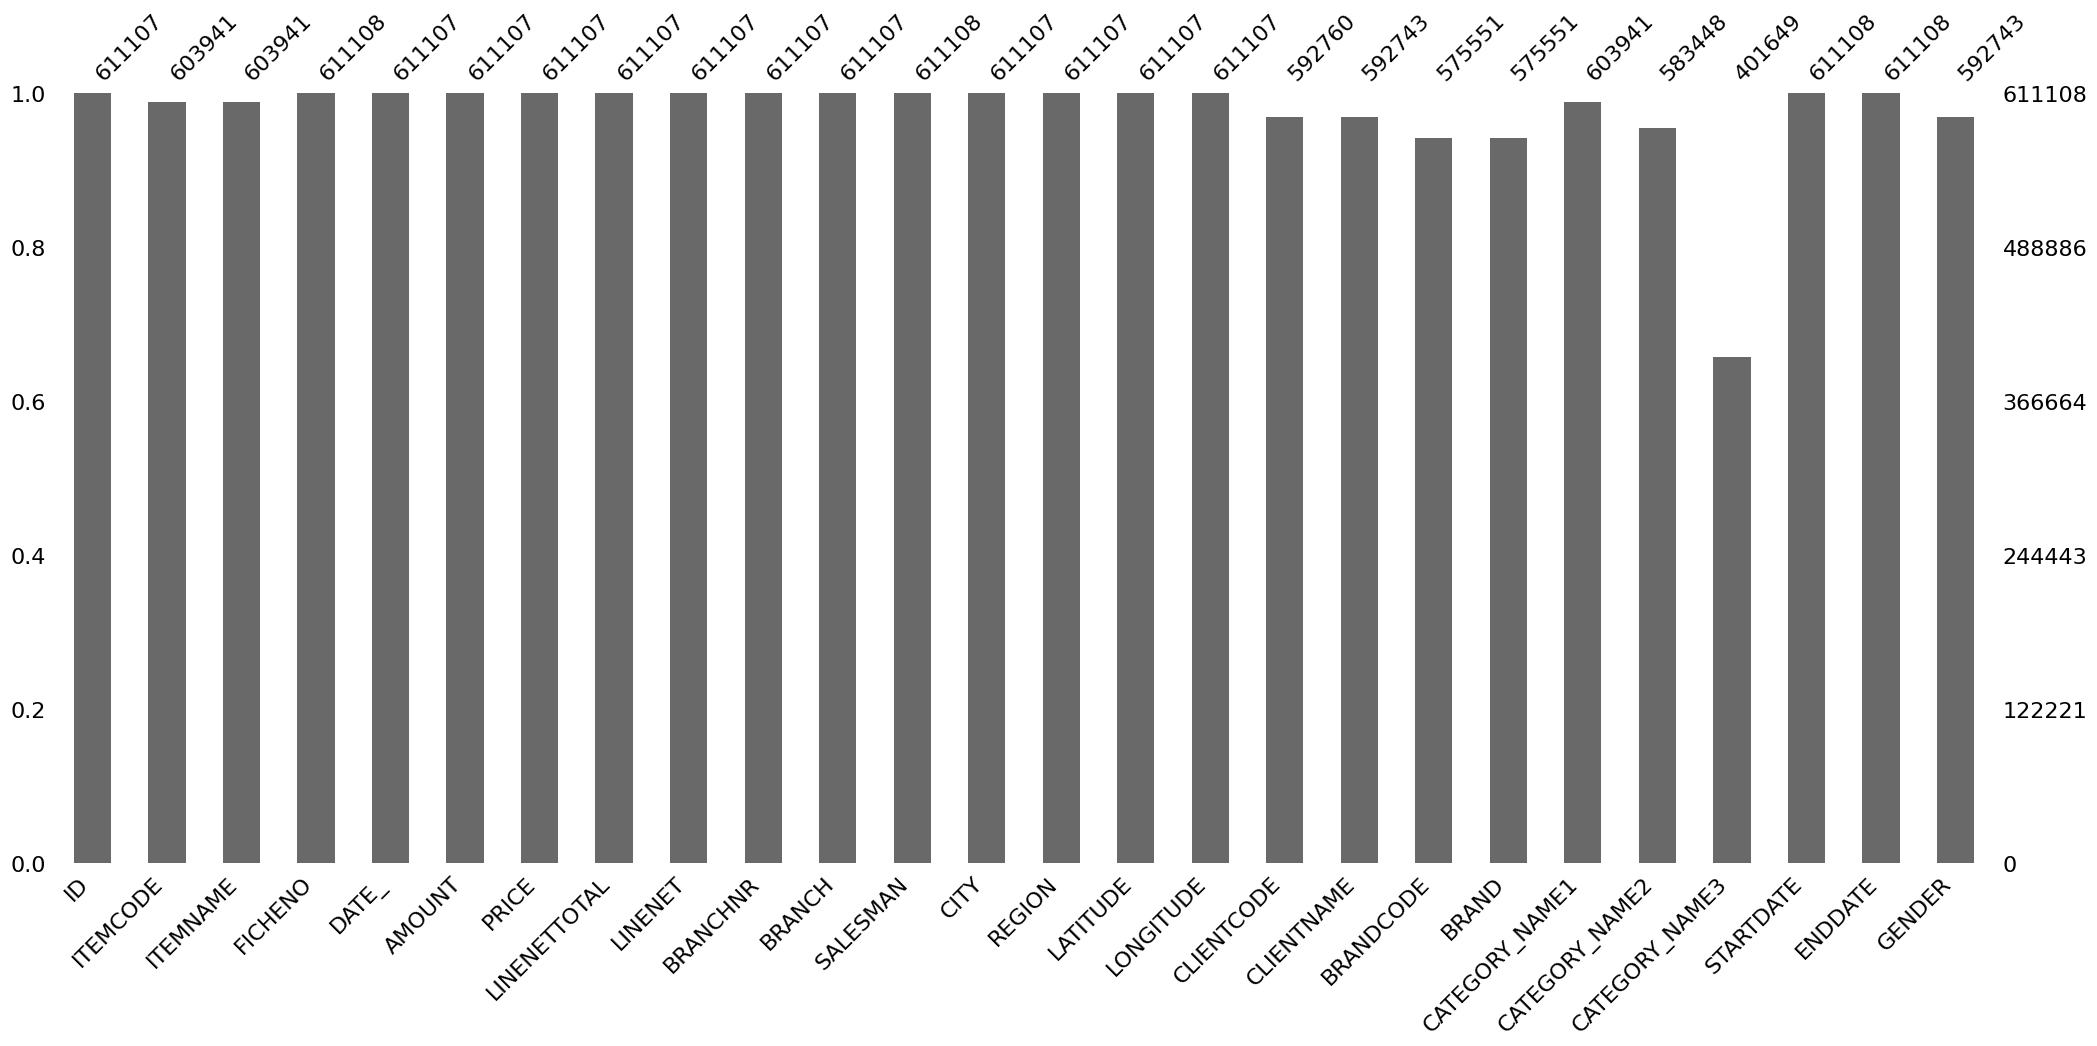

In [66]:
#see the completeness of the data using mano.bar
mano.bar(missingdf)

<Axes: >

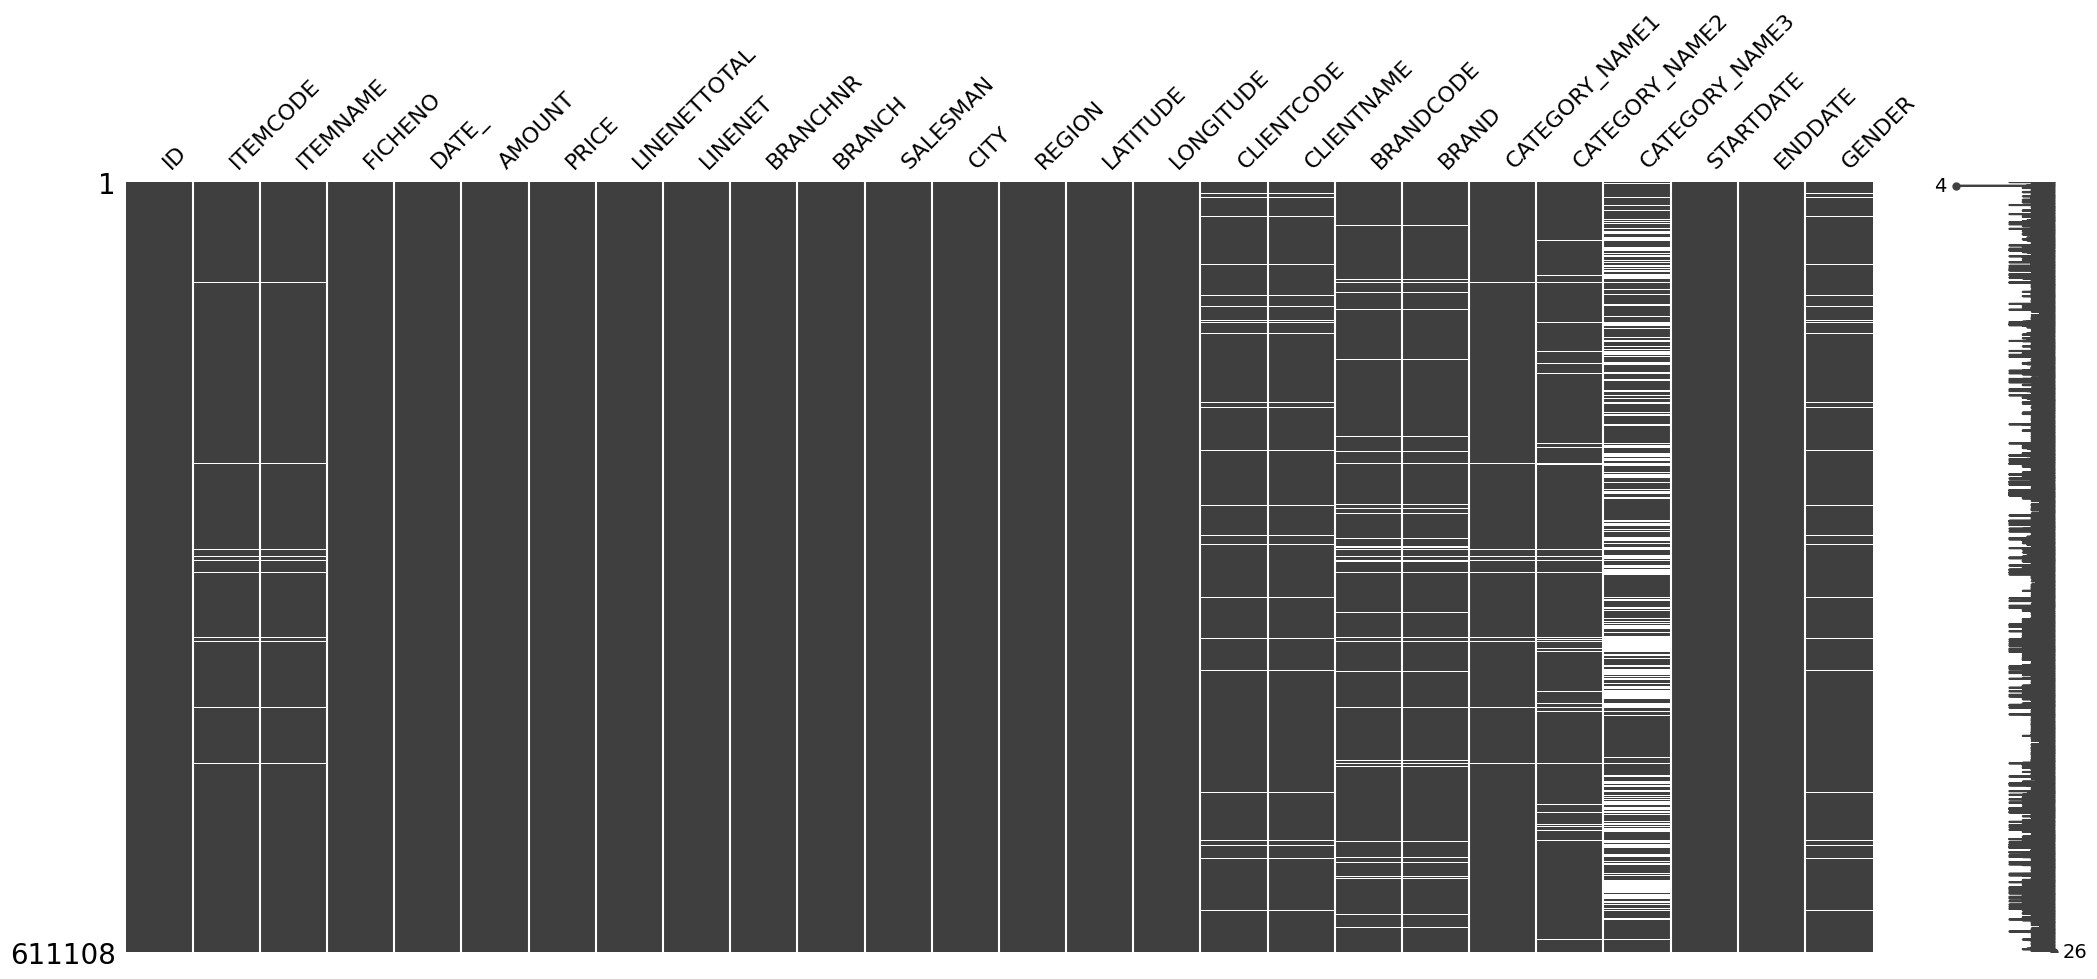

In [67]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(missingdf)

There are three examples of MNAR: (ITEMCODE & ITEMNAME), (CLIENTCODE, CLIENTNAME & GENDER), (BRAND & BRANDCODE)

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

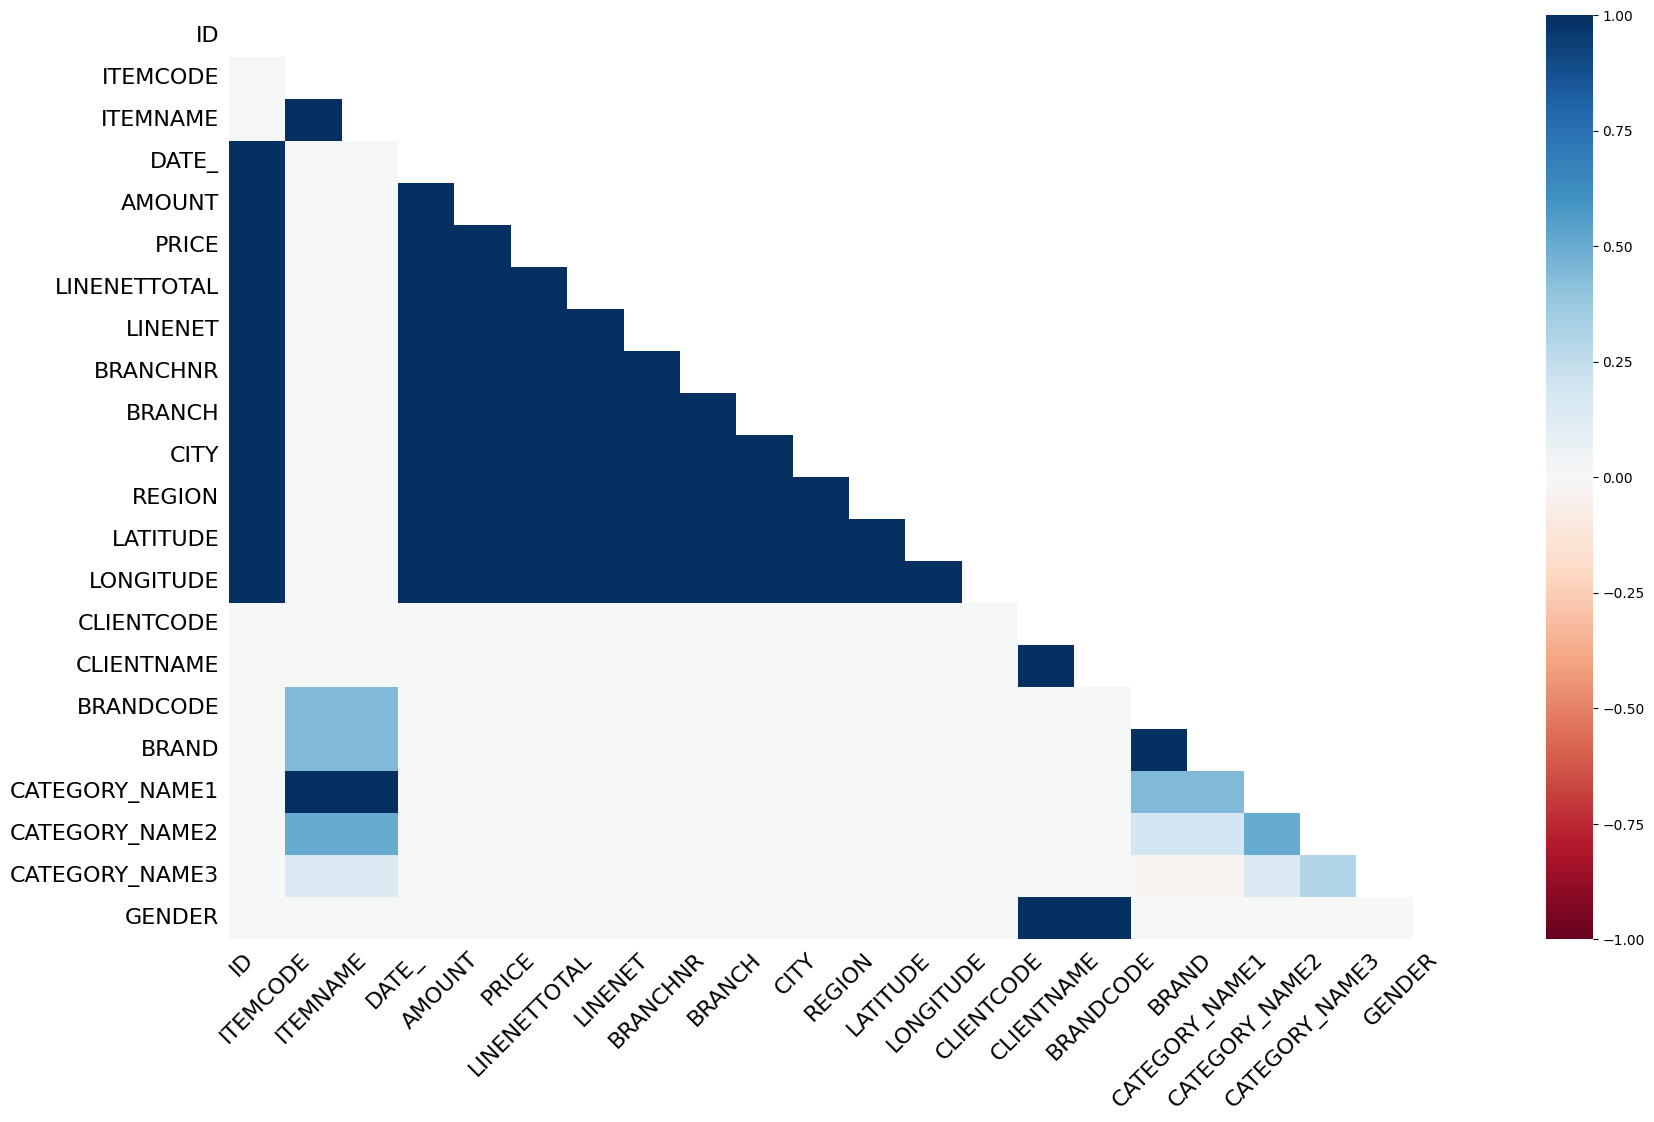

In [68]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns
mano.heatmap(missingdf)

Strong Positive Correlations: The deep blue areas on the diagonal represent a correlation coefficient of 1, which is natural as it indicates each variable’s correlation with itself. The deeper blue shades off the diagonal suggest strong positive correlations between these variables. For example, 'AMOUNT', 'PRICE', 'LINENET', and 'LINENETTOTAL' appear to have high positive correlations with each other, which is expected as they are all related to financial amounts in transactions.

Negative or Low Correlations: The lighter shades or white color indicate low to no correlation between the respective variables. This is visible between many pairs of variables, such as 'BRAND' or 'CATEGORY_NAME' variables with geographical variables like 'LATITUDE' and 'LONGITUDE'.

Variable Groupings: The clustering of similar colors in certain sections of the heatmap suggests that those groups of variables share similar relationships with other variables. For example, geographical variables ('CITY', 'REGION', 'LATITUDE', 'LONGITUDE') and transaction-related variables ('AMOUNT', 'PRICE', 'LINENET', 'LINENETTOTAL') form distinct clusters indicating similar correlation patterns within each group.



<Axes: >

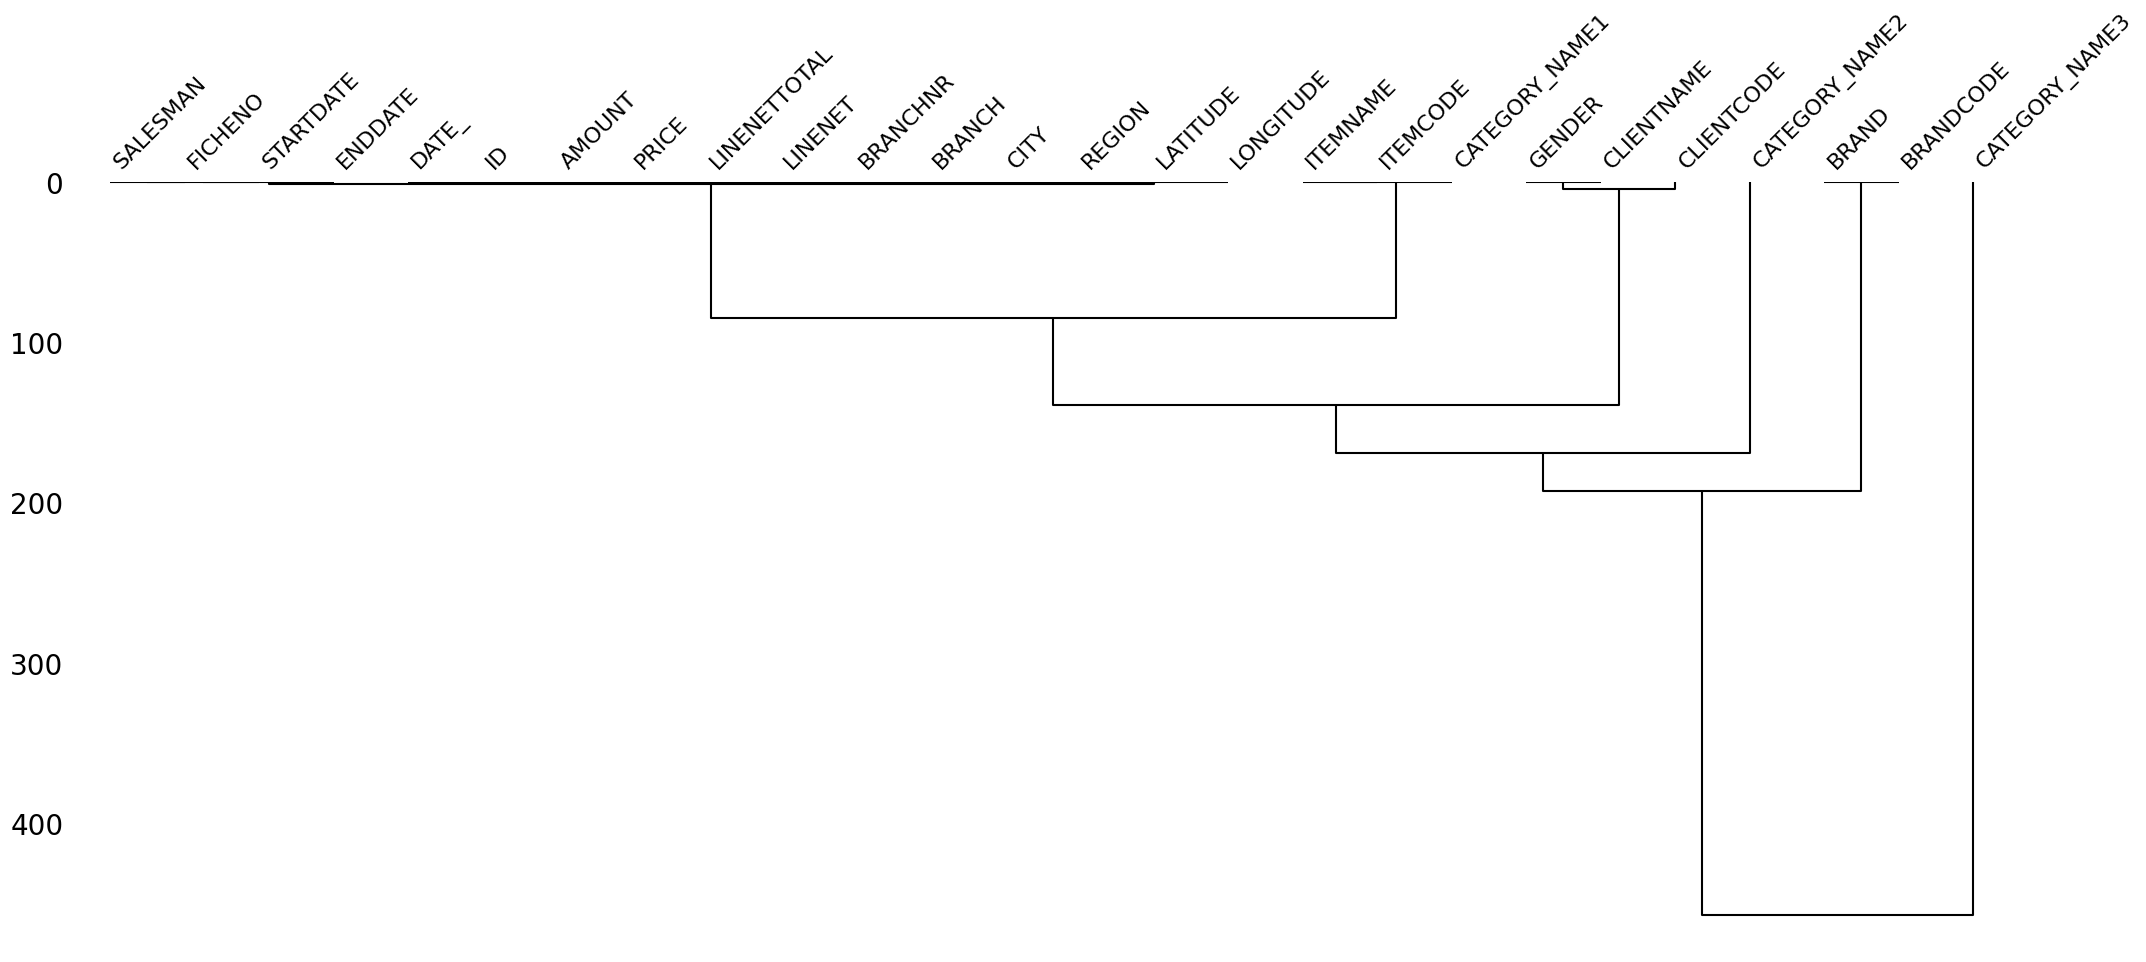

In [69]:
#dendogram will quantify and cluster the missingness
mano.dendrogram(missingdf)

Highly Clustered Variables: Several groups of variables are tightly clustered together, indicating strong similarity or redundancy between them. For example:

Geographical Variables: 'LATITUDE' and 'LONGITUDE' are closely linked, which is expected as both represent geographical coordinates.
Sales and Financial Variables: 'AMOUNT', 'PRICE', 'LINENET', and 'LINETOTAL' form another cluster, suggesting these variables are related, possibly representing different aspects of financial transactions.
Branch Structure: The dendrogram has a distinct branch structure where the depth at which branches merge indicates the level of similarity. Variables that join at lower heights are more similar than those joining higher up.

Potential for Dimensionality Reduction: Given the clustering of some variables, there might be potential for dimensionality reduction, either by removing redundant variables or by combining them into a single variable.

Disparate Groups: There are also groups of variables that are distinctly different from others, such as 'SALESMAN', 'FICHENO', 'STARTDATE', 'ENDDATE', 'ID', which are relatively distant from variables like 'CITY', 'REGION', 'ITEMNAME'. This suggests these groups of variables capture fundamentally different kinds of information.

In [70]:
print(missingdf[missingdf['ITEMNAME'].isna()]['ITEMCODE'])

49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
          ..
608865   NaN
608866   NaN
608867   NaN
608868   NaN
608869   NaN
Name: ITEMCODE, Length: 7167, dtype: float64


## Logical Imputation for ITEMCODE AND ITEMNAME BASED ON FICHENO

We can fill most of the missing ITEMCODE and ITEMNAME (which is an example of MNAR) using FICHENO, avoiding the recommnded strategy which is deletion

In [71]:
# Check if ITEMCODE is missing and FICHENO is present
mask = missingdf['ITEMCODE'].isna() & missingdf['FICHENO'].notna()

# Create a dictionary mapping FICHENO to ITEMCODE from rows where ITEMCODE is not missing
itemcode_mapping = missingdf.dropna(subset=['ITEMCODE', 'FICHENO']).set_index('FICHENO')['ITEMCODE'].to_dict()

# Apply the mapping to fill missing ITEMCODEs
missingdf.loc[mask, 'ITEMCODE'] = missingdf.loc[mask, 'FICHENO'].map(itemcode_mapping)

# Check for any remaining missing ITEMCODEs to handle cases where no matching FICHENO was found
remaining_missing = missingdf['ITEMCODE'].isna().sum()
print(f'Remaining missing ITEMCODE entries: {remaining_missing}')

Remaining missing ITEMCODE entries: 940


In [72]:
# Check if ITEMNAME is missing and FICHENO is present
mask = missingdf['ITEMNAME'].isna() & missingdf['FICHENO'].notna()

# Create a dictionary mapping FICHENO to ITEMNAME from rows where ITEMNAME is not missing
itemname_mapping = missingdf.dropna(subset=['ITEMNAME', 'FICHENO']).set_index('FICHENO')['ITEMNAME'].to_dict()

# Apply the mapping to fill missing ITEMNAMEs
missingdf.loc[mask, 'ITEMNAME'] = missingdf.loc[mask, 'FICHENO'].map(itemname_mapping)

# Check for any remaining missing ITEMNAMEs to handle cases where no matching FICHENO was found
remaining_missing = missingdf['ITEMNAME'].isna().sum()
print(f'Remaining missing ITEMNAME entries: {remaining_missing}')

Remaining missing ITEMNAME entries: 940


In [73]:
# Replace remaining missing ITEMCODE with a numerical placeholder
missingdf['ITEMCODE'] = missingdf['ITEMCODE'].fillna(-1)  

In [74]:
# Replace remaining missing ITEMNAME with a placeholder
missingdf['ITEMNAME'] = missingdf['ITEMNAME'].fillna('UNKNOWN')  

Filling CATEGORY_NAME1 using Mode

In [75]:
mean_imputation = SimpleImputer(strategy='most_frequent')

missingdf[['CATEGORY_NAME1']] = mean_imputation.fit_transform(missingdf[['CATEGORY_NAME1']])

remaining_missing = missingdf['CATEGORY_NAME1'].isna().sum()
print(f'Remaining missing CATEGORY_NAME1 entries: {remaining_missing}')

Remaining missing CATEGORY_NAME1 entries: 0


For the CATEGORY_NAME2 we can use the CATEGORY_NAME1 column to create a mapping

In [76]:
# Check if CATEGORY_NAME2 is missing and CATEGORY_NAME1 is present
mask = missingdf['CATEGORY_NAME2'].isna() & missingdf['CATEGORY_NAME1'].notna()

# Create a dictionary mapping CATEGORY_NAME1 to CATEGORY_NAME2 from rows where CATEGORY_NAME2 is not missing
category_mapping = missingdf.dropna(subset=['CATEGORY_NAME2', 'CATEGORY_NAME1']).set_index('CATEGORY_NAME1')['CATEGORY_NAME2'].to_dict()

# Apply the mapping to fill missing CATEGORY_NAME2s
missingdf.loc[mask, 'CATEGORY_NAME2'] = missingdf.loc[mask, 'CATEGORY_NAME1'].map(category_mapping)

# Check for any remaining missing CATEGORY_NAME2s to handle cases where no matching CATEOGORY_NAME1 was found
remaining_missing = missingdf['CATEGORY_NAME2'].isna().sum()
print(f'Remaining missing CATEGORY_NAME2 entries: {remaining_missing}')

Remaining missing CATEGORY_NAME2 entries: 19031


Filling the remaining CATEGORY_NAME2 using Mode

In [77]:
mean_imputation = SimpleImputer(strategy='most_frequent')

missingdf[['CATEGORY_NAME2']] = mean_imputation.fit_transform(missingdf[['CATEGORY_NAME2']])

remaining_missing = missingdf['CATEGORY_NAME2'].isna().sum()
print(f'Remaining missing CATEGORY_NAME2 entries: {remaining_missing}')

Remaining missing CATEGORY_NAME2 entries: 0


For the CATEGORY_NAME3 we can use the CATEGORY_NAME1 column to create a mapping

In [78]:
# Check if CATEGORY_NAME3 is missing and CATEGORY_NAME1 is present
mask = missingdf['CATEGORY_NAME3'].isna() & missingdf['CATEGORY_NAME1'].notna()

# Create a dictionary mapping CATEGORY_NAME1 to CATEGORY_NAME3 from rows where CATEGORY_NAME3 is not missing
category_mapping = missingdf.dropna(subset=['CATEGORY_NAME3', 'CATEGORY_NAME1']).set_index('CATEGORY_NAME1')['CATEGORY_NAME3'].to_dict()

# Apply the mapping to fill missing CATEGORY_NAME3s
missingdf.loc[mask, 'CATEGORY_NAME3'] = missingdf.loc[mask, 'CATEGORY_NAME1'].map(category_mapping)

# Check for any remaining missing CATEGORY_NAME3s to handle cases where no matching CATEGORY_NAME1 was found
remaining_missing = missingdf['CATEGORY_NAME3'].isna().sum()
print(f'Remaining missing CATEGORY_NAME3 entries: {remaining_missing}')

Remaining missing CATEGORY_NAME3 entries: 130903


In [79]:
mean_imputation = SimpleImputer(strategy='most_frequent')

missingdf[['CATEGORY_NAME3']] = mean_imputation.fit_transform(missingdf[['CATEGORY_NAME3']])

remaining_missing = missingdf['CATEGORY_NAME3'].isna().sum()
print(f'Remaining missing CATEGORY_NAME3 entries: {remaining_missing}')

Remaining missing CATEGORY_NAME3 entries: 0


In [85]:
missingdf.isna().sum()

ID                    1
ITEMCODE              0
ITEMNAME              0
FICHENO               0
DATE_                 1
AMOUNT                1
PRICE                 1
LINENETTOTAL          1
LINENET               1
BRANCHNR              1
BRANCH                1
SALESMAN              0
CITY                  1
REGION                1
LATITUDE              1
LONGITUDE             1
CLIENTCODE        18348
CLIENTNAME        18365
BRANDCODE         35557
BRAND             35557
CATEGORY_NAME1        0
CATEGORY_NAME2        0
CATEGORY_NAME3        0
STARTDATE             0
ENDDATE               0
GENDER            18365
dtype: int64

In [83]:
# Replace 'E' with 'Male' and 'K' with 'Female' : to improve readability of Genders from Turkish to English 
missingdf['GENDER'] = missingdf['GENDER'].replace({'E': 'Male', 'K': 'Female'})

In [ ]:
# remove rows which have column REGION missing
missingdf = missingdf.dropna(subset=['REGION'])

In [84]:
# Save the filled DataFrame
missingdf.to_excel('Dataset/updated_marketsales.xlsx', index=False)